In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('alzheimer.csv')

In [3]:
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [5]:
data.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [6]:
data.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [12]:
data['SES'].fillna(data['SES'].mean(), inplace=True)
data['MMSE'].fillna(data['MMSE'].mean(), inplace=True)

data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,2,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,2,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,2,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034


Text(0.5, 1.0, 'Yaş-Eğitim Dağılımı')

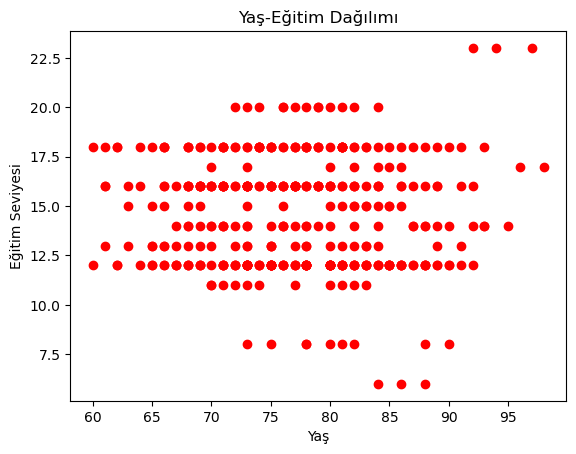

In [8]:
import matplotlib.pyplot as plt

plt.scatter(data['Age'], data['EDUC'], color='red', marker='o')
plt.xlabel('Yaş')
plt.ylabel('Eğitim Seviyesi')
plt.title('Yaş-Eğitim Dağılımı')

In [9]:
data['Group'] = data['Group'].map({'Nondemented': 0, 'Converted': 1, 'Demented': 2})

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
data['M/F'] = label_encoder.fit_transform(data['M/F'])

In [14]:
x = data.drop('Group', axis=1)
y = data['Group']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [ ]:
scaler = StandardScaler()

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)